<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Coursera/c2_w1_1_CatAndDog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download and Explore the example dataset

In [1]:
# Download Dataset
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-04-24 09:54:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.80, 172.217.13.240, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   135MB/s    in 0.5s    

2021-04-24 09:54:44 (135 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Extract Dataset
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

In [5]:
print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])
print(validation_cats_fnames[:10])
print(validation_dogs_fnames[:10])

['cat.324.jpg', 'cat.917.jpg', 'cat.4.jpg', 'cat.381.jpg', 'cat.311.jpg', 'cat.597.jpg', 'cat.717.jpg', 'cat.683.jpg', 'cat.749.jpg', 'cat.889.jpg']
['dog.743.jpg', 'dog.281.jpg', 'dog.261.jpg', 'dog.92.jpg', 'dog.537.jpg', 'dog.280.jpg', 'dog.649.jpg', 'dog.622.jpg', 'dog.188.jpg', 'dog.572.jpg']
['cat.2330.jpg', 'cat.2180.jpg', 'cat.2195.jpg', 'cat.2276.jpg', 'cat.2216.jpg', 'cat.2262.jpg', 'cat.2229.jpg', 'cat.2438.jpg', 'cat.2433.jpg', 'cat.2053.jpg']
['dog.2358.jpg', 'dog.2268.jpg', 'dog.2340.jpg', 'dog.2381.jpg', 'dog.2331.jpg', 'dog.2290.jpg', 'dog.2413.jpg', 'dog.2442.jpg', 'dog.2005.jpg', 'dog.2445.jpg']


Print Cats and Dogs image count

In [6]:
print('Total training cats images : ', len(train_cats_fnames))
print('Total training dogs images : ', len(train_dogs_fnames))

print('Total validation cats images : ', len(validation_cats_fnames))
print('Total validation cats images : ', len(validation_dogs_fnames))

Total training cats images :  1000
Total training dogs images :  1000
Total validation cats images :  500
Total validation cats images :  500


## Plot few images

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0


Now display a batch of 8 cats and 8 dogs. You can rerun the cell to see a fresh batch each time.

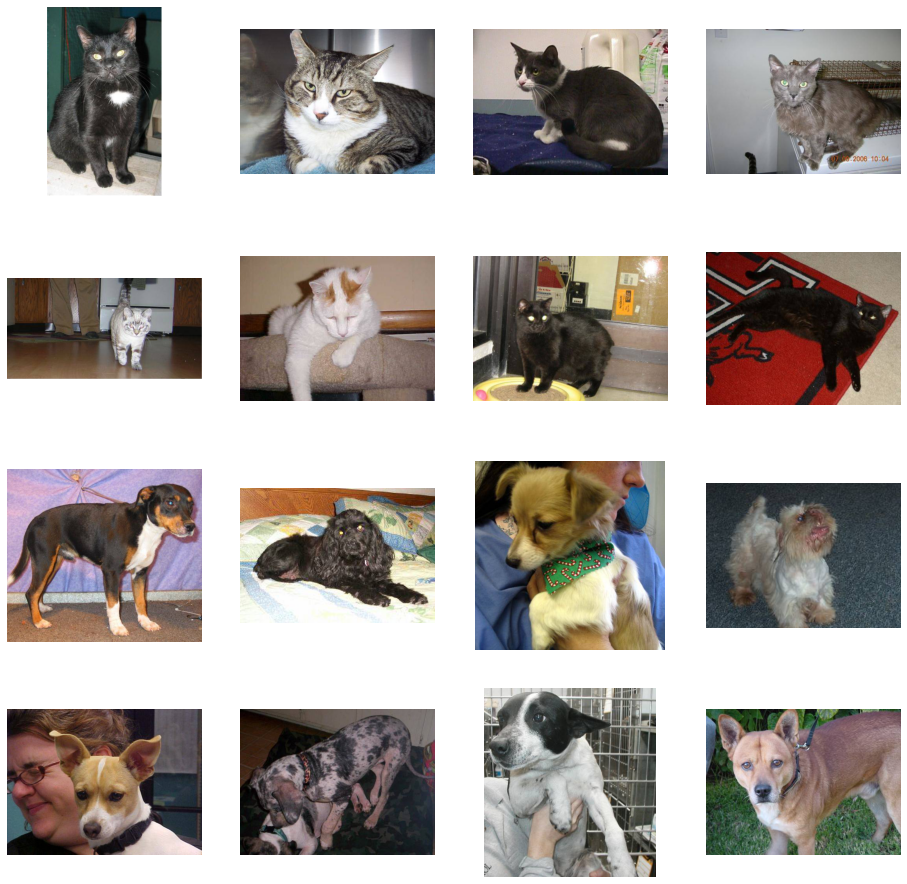

In [8]:
# setup matplotlib fig and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pics = [os.path.join(train_cats_dir, fname)
                  for fname in train_cats_fnames[pic_index-8: pic_index]]

next_dog_pics = [os.path.join(train_dogs_dir, fname)
                  for fname in train_dogs_fnames[pic_index-8: pic_index]]

for i, img_path in enumerate(next_cat_pics + next_dog_pics):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Build a CNN Model

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Compile Model

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Data Preprocessing

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

# 

Found 2000 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 10,
                              validation_data = validation_generator,
                              validation_steps = 50,
                              verbose = 2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 - 41s - loss: 0.7240 - accuracy: 0.5610 - val_loss: 0.6242 - val_accuracy: 0.6650
Epoch 2/10
100/100 - 8s - loss: 0.6338 - accuracy: 0.6570 - val_loss: 0.6151 - val_accuracy: 0.6470
Epoch 3/10
100/100 - 8s - loss: 0.5691 - accuracy: 0.7110 - val_loss: 0.6008 - val_accuracy: 0.6970
Epoch 4/10
100/100 - 8s - loss: 0.4967 - accuracy: 0.7470 - val_loss: 0.5636 - val_accuracy: 0.7340
Epoch 5/10
100/100 - 8s - loss: 0.4332 - accuracy: 0.7990 - val_loss: 0.7643 - val_accuracy: 0.6530
Epoch 6/10
100/100 - 8s - loss: 0.3650 - accuracy: 0.8365 - val_loss: 0.6427 - val_accuracy: 0.7260
Epoch 7/10
100/100 - 8s - loss: 0.2923 - accuracy: 0.8725 - val_loss: 0.6976 - val_accuracy: 0.7070
Epoch 8/10
100/100 - 8s - loss: 0.2254 - accuracy: 0.9095 - val_loss: 0.8066 - val_accuracy: 0.7320
Epoch 9/10
100/100 - 8s - loss: 0.1788 - accuracy: 0.9285 - val_loss: 0.8334 - val_accuracy: 0.7160
Epoch 10/10
100/100 - 8s - loss: 0.1225 - accuracy: 0.9505 - val_loss: 1.0757 - val_accuracy: 0.719

## Running the Model

In [17]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting Images
  path = '/content/' + fn 
  img = image.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0:
    print(fn + ' is a Dog')
  else:
    print(fn + ' is a Cat')

Saving car22.png to car22.png
Saving cat1.jpeg to cat1.jpeg
Saving cat2.jpeg to cat2.jpeg
Saving dog1.jpeg to dog1.jpeg
Saving dog2.jpeg to dog2.jpeg
[1.]
car22.png is a Dog
[0.]
cat1.jpeg is a Cat
[0.]
cat2.jpeg is a Cat
[0.]
dog1.jpeg is a Cat
[1.]
dog2.jpeg is a Dog


## Evaluating Accuracy and Loss for the Model

<Figure size 432x288 with 0 Axes>

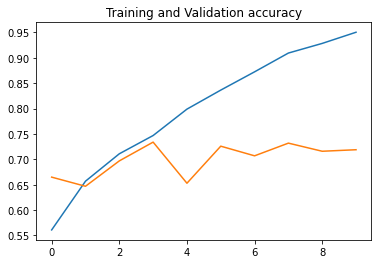

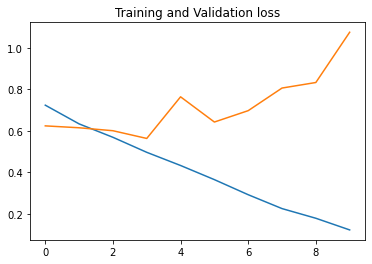

<Figure size 432x288 with 0 Axes>

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and Validation accuracy')
plt.figure()

# Plot Training and Validation loss per epoch
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation loss')
plt.figure()